In [4]:
import cv2
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

## Project 9 : Histogram Specification

### 9.1 Implementation

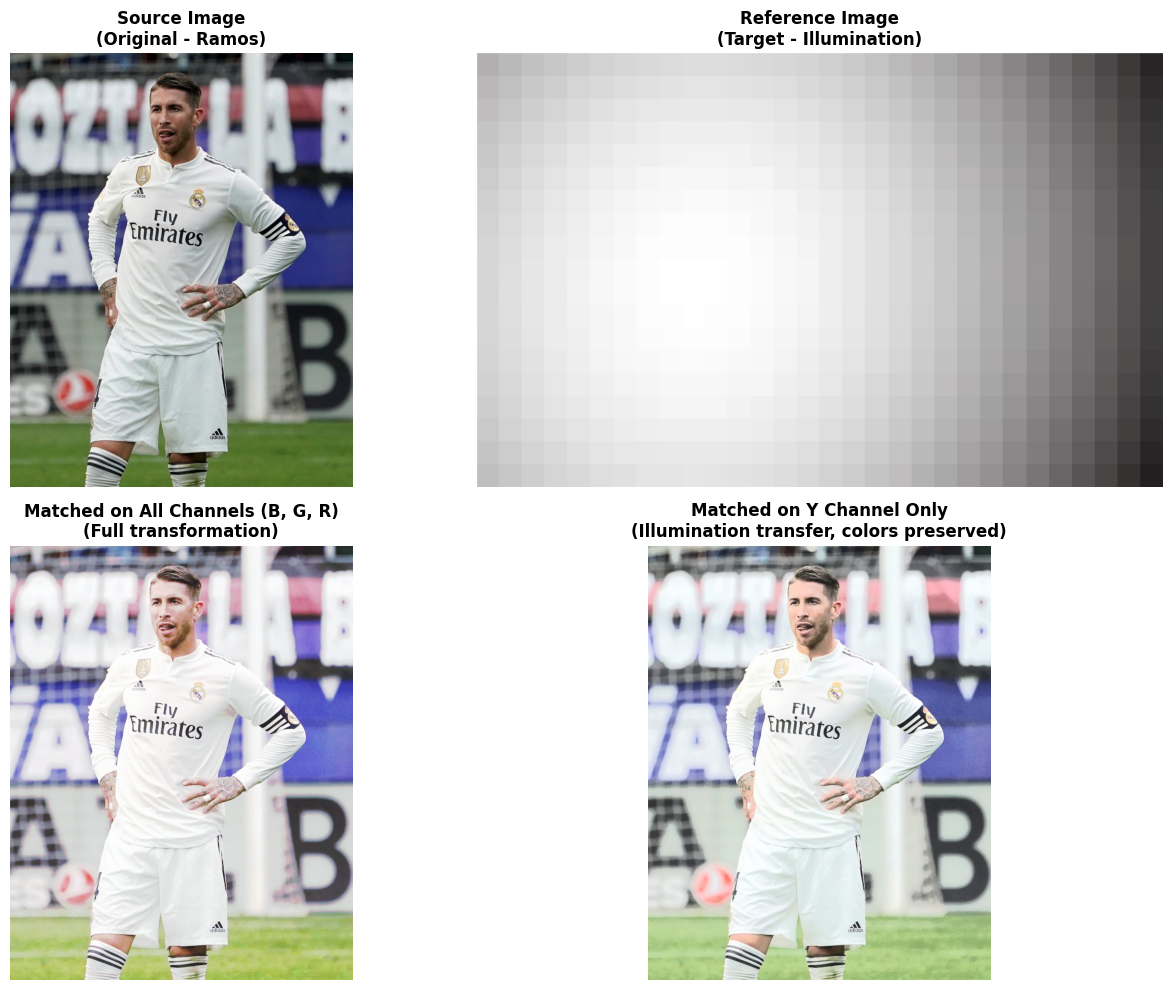

In [5]:
# ===================================================================
# LOAD IMAGES
# ===================================================================
source = cv2.imread('./images/ramos.jpg')
reference = cv2.imread('./images/illumination.png')

# ===================================================================
# APPROACH 1: Match Y Channel Only (YCrCb Color Space)
# ===================================================================
# This approach preserves the original colors while matching lighting

# Step 1: Convert both images to YCrCb color space
source_ycrcb = cv2.cvtColor(source, cv2.COLOR_BGR2YCrCb)
ref_ycrcb = cv2.cvtColor(reference, cv2.COLOR_BGR2YCrCb)

# Step 2: Extract and match ONLY the Y (brightness) channel
matched_y = match_histograms(source_ycrcb[:,:,0], ref_ycrcb[:,:,0])

# Step 3: Replace Y channel with matched version
source_ycrcb[:,:,0] = matched_y

# Step 4: Convert back to BGR
result_y_only = cv2.cvtColor(source_ycrcb, cv2.COLOR_YCrCb2BGR)

# ===================================================================
# APPROACH 2: Match All BGR Channels
# ===================================================================
# This approach matches brightness AND color

# Match all three channels (B, G, R) independently
matched_all_channels = match_histograms(source, reference, channel_axis=-1)

# ===================================================================
# VISUALIZATION
# ===================================================================
# Convert to RGB for proper display in matplotlib
source_rgb = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
ref_rgb = cv2.cvtColor(reference, cv2.COLOR_BGR2RGB)
matched_all_rgb = cv2.cvtColor(matched_all_channels, cv2.COLOR_BGR2RGB)
result_y_only_rgb = cv2.cvtColor(result_y_only, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.imshow(source_rgb)
plt.title("Source Image\n(Original - Ramos)", fontsize=12, fontweight='bold')
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(ref_rgb)
plt.title("Reference Image\n(Target - Illumination)", fontsize=12, fontweight='bold')
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(matched_all_rgb)
plt.title("Matched on All Channels (B, G, R)\n(Full transformation)", 
          fontsize=12, fontweight='bold')
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(result_y_only_rgb)
plt.title("Matched on Y Channel Only\n(Illumination transfer, colors preserved)", 
          fontsize=12, fontweight='bold')
plt.axis("off")

plt.tight_layout()

### 9.2 Histogram Comparison

C:\Users\hp\AppData\Local\Temp\ipykernel_21436\1978430357.py:37: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax5.hist(source_gray.ravel(), 256, [0, 256], color='blue', alpha=0.7)
C:\Users\hp\AppData\Local\Temp\ipykernel_21436\1978430357.py:44: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax6.hist(ref_gray.ravel(), 256, [0, 256], color='green', alpha=0.7)
C:\Users\hp\AppData\Local\Temp\ipykernel_21436\1978430357.py:51: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  ax7.hist(matched_all_gray.ravel(), 256, [0, 256], color='red', alpha=0.7)
C:\Users\hp\AppData\Local\Temp\ipykernel_21436\1978430357.py:58: MatplotlibDeprecationWar

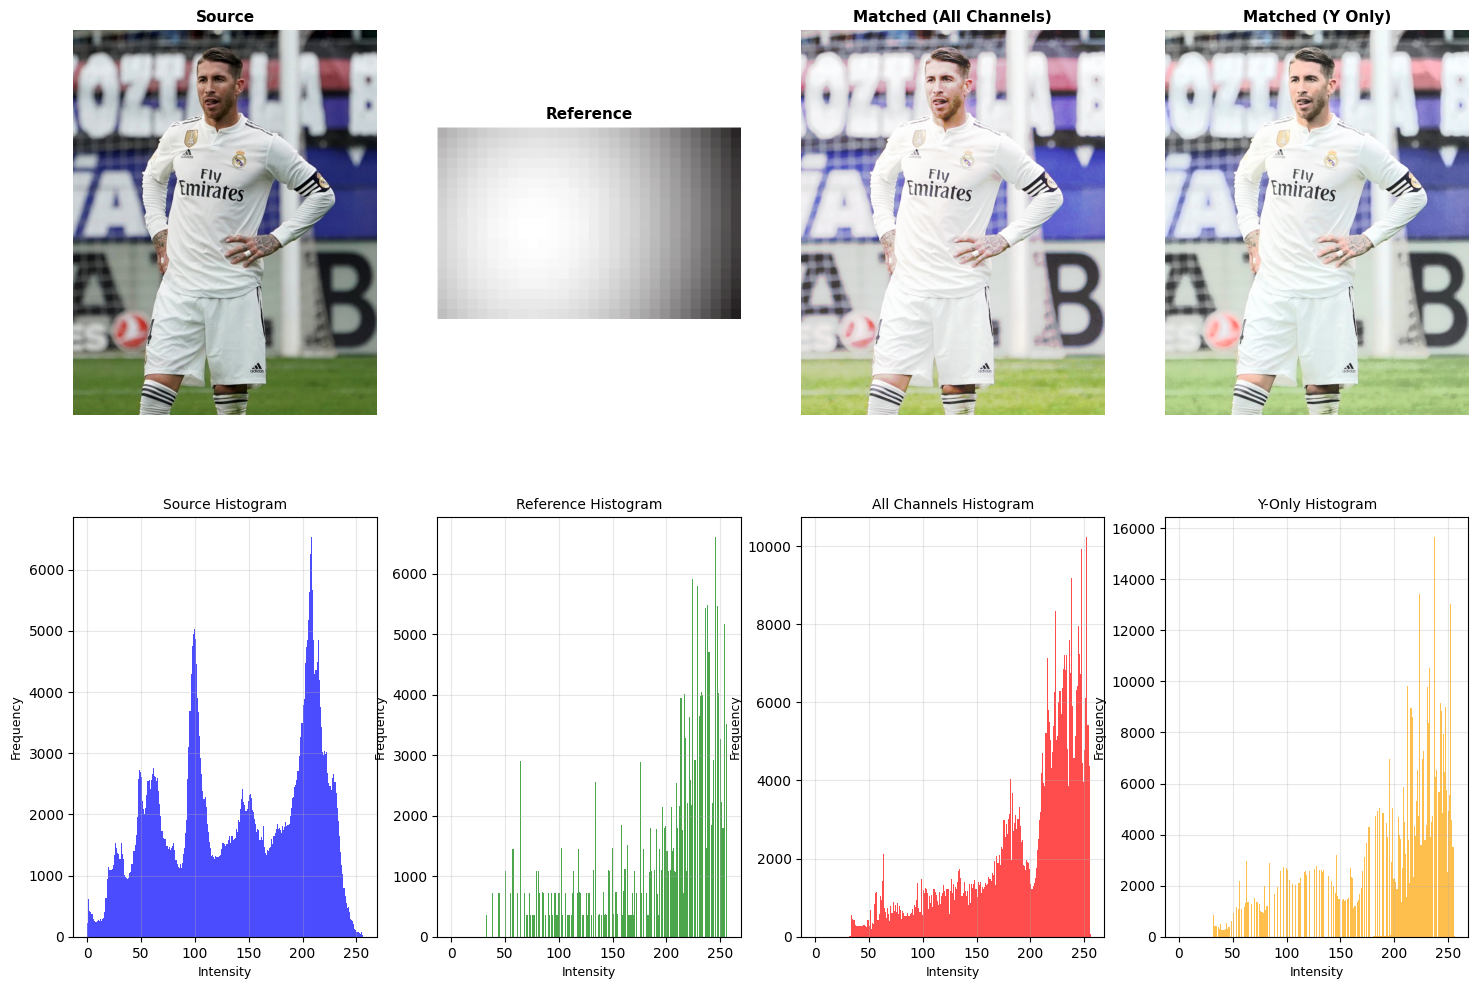

In [6]:
# Extract grayscale versions for histogram comparison
source_gray = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
ref_gray = cv2.cvtColor(reference, cv2.COLOR_BGR2GRAY)
matched_all_gray = cv2.cvtColor(matched_all_channels, cv2.COLOR_BGR2GRAY)
result_y_gray = cv2.cvtColor(result_y_only, cv2.COLOR_BGR2GRAY)

# Create comprehensive histogram comparison
fig = plt.figure(figsize=(18, 12))

# ===================================================================
# Row 1: Images
# ===================================================================
ax1 = plt.subplot(2, 4, 1)
ax1.imshow(source_rgb)
ax1.set_title("Source", fontsize=11, fontweight='bold')
ax1.axis("off")

ax2 = plt.subplot(2, 4, 2)
ax2.imshow(ref_rgb)
ax2.set_title("Reference", fontsize=11, fontweight='bold')
ax2.axis("off")

ax3 = plt.subplot(2, 4, 3)
ax3.imshow(matched_all_rgb)
ax3.set_title("Matched (All Channels)", fontsize=11, fontweight='bold')
ax3.axis("off")

ax4 = plt.subplot(2, 4, 4)
ax4.imshow(result_y_only_rgb)
ax4.set_title("Matched (Y Only)", fontsize=11, fontweight='bold')
ax4.axis("off")

# ===================================================================
# Row 2: Grayscale Histograms
# ===================================================================
ax5 = plt.subplot(2, 4, 5)
ax5.hist(source_gray.ravel(), 256, [0, 256], color='blue', alpha=0.7)
ax5.set_title("Source Histogram", fontsize=10)
ax5.set_xlabel("Intensity", fontsize=9)
ax5.set_ylabel("Frequency", fontsize=9)
ax5.grid(True, alpha=0.3)

ax6 = plt.subplot(2, 4, 6)
ax6.hist(ref_gray.ravel(), 256, [0, 256], color='green', alpha=0.7)
ax6.set_title("Reference Histogram", fontsize=10)
ax6.set_xlabel("Intensity", fontsize=9)
ax6.set_ylabel("Frequency", fontsize=9)
ax6.grid(True, alpha=0.3)

ax7 = plt.subplot(2, 4, 7)
ax7.hist(matched_all_gray.ravel(), 256, [0, 256], color='red', alpha=0.7)
ax7.set_title("All Channels Histogram", fontsize=10)
ax7.set_xlabel("Intensity", fontsize=9)
ax7.set_ylabel("Frequency", fontsize=9)
ax7.grid(True, alpha=0.3)

ax8 = plt.subplot(2, 4, 8)
ax8.hist(result_y_gray.ravel(), 256, [0, 256], color='orange', alpha=0.7)
ax8.set_title("Y-Only Histogram", fontsize=10)
ax8.set_xlabel("Intensity", fontsize=9)
ax8.set_ylabel("Frequency", fontsize=9)
ax8.grid(True, alpha=0.3)
